### Data preprocessing

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#### Loading the dataset with correct divider

In [4]:
df = pd.read_csv('./Dataset/bank-full.csv', delimiter=';')
df.head(20)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


#### Checking for missing values

In [5]:
print(df.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


#### Checking for duplicate values

In [6]:
print(df.duplicated().sum())  # Count the number of duplicate rows

0


#### Identify the datatypes

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [8]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


#### Getting the numerical values

In [9]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("Numeric Columns:", numeric_columns)

Numeric Columns: Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')


#### Getting the Categorical values

In [10]:
categorical_columns = df.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_columns)

Categorical Columns: Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')


#### Checking for the Boolean values

In [11]:
boolean_columns = df.select_dtypes(include=['bool']).columns
print("Boolean Columns:", boolean_columns)

Boolean Columns: Index([], dtype='object')


#### Indentifying the unique values for each columns one by one

In [12]:
df['job'].unique()
df['marital'].unique()
df['education'].unique()
df['default'].unique()
df['housing'].unique()
df['contact'].unique()
df['month'].unique()
df['poutcome'].unique()
df['y'].unique()
df['campaign'].unique()


array([ 1,  2,  3,  5,  4,  6,  7,  8,  9, 10, 11, 12, 13, 19, 14, 24, 16,
       32, 18, 22, 15, 17, 25, 21, 43, 51, 63, 41, 26, 28, 55, 50, 38, 23,
       20, 29, 31, 37, 30, 46, 27, 58, 33, 35, 34, 36, 39, 44],
      dtype=int64)

#### Checking whether y depends on contact feature

##### To determine if the feature is important, chi2_contingency test is used to evaluate independence of the two categorical variables.

In [13]:
from scipy.stats import chi2_contingency

# If p value is < 0.05, the feature is influencing the targeted variable

crosstab = pd.crosstab(df['contact'], df['y'])
chi2, p, dof, expected = chi2_contingency(crosstab)
print("Chi-square statistic:", chi2)
print("p-value:", p)


Chi-square statistic: 1035.714225356292
p-value: 1.251738325340638e-225


##### As we can see the p value is extremely small. that means this feature extremely influences the targeted variable


#### Check for poutcome feature

In [14]:
crosstab = pd.crosstab(df['poutcome'], df['y'])
chi2, p, dof, expected = chi2_contingency(crosstab)
print("Chi-square statistic:", chi2)
print("p-value:", p)

Chi-square statistic: 4391.5065887686615
p-value: 0.0


#### Encoding the Y variable and Checking the correlation between the numerical features

In [15]:
from scipy.stats import pointbiserialr

# Step 1: Convert 'y' to numeric (binary)
df['y'] = df['y'].map({'no': 0, 'yes': 1})

# Step 2: Define numerical features
numerical_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# Step 3: Calculate Point-Biserial Correlation for each feature
correlation_results = []
for col in numerical_features:
    corr, p_value = pointbiserialr(df[col], df['y'])
    correlation_results.append((col, corr, p_value))

# Step 4: Print results
print("Feature-wise Point-Biserial Correlation and p-values:")
for feature, corr, p_value in correlation_results:
    print(f"Feature: {feature}, Correlation: {corr:.3f}, p-value: {p_value:.3f}")

Feature-wise Point-Biserial Correlation and p-values:
Feature: age, Correlation: 0.025, p-value: 0.000
Feature: balance, Correlation: 0.053, p-value: 0.000
Feature: day, Correlation: -0.028, p-value: 0.000
Feature: duration, Correlation: 0.395, p-value: 0.000
Feature: campaign, Correlation: -0.073, p-value: 0.000
Feature: pdays, Correlation: 0.104, p-value: 0.000
Feature: previous, Correlation: 0.093, p-value: 0.000


#### Plotting the correlation in a heatmap for better visualization

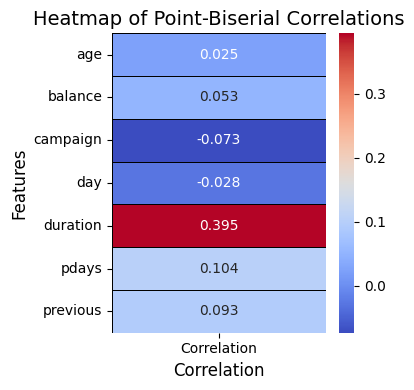

In [16]:
import seaborn as sns

# Convert correlation results to a DataFrame
correlation_df = pd.DataFrame(correlation_results, columns=['Feature', 'Correlation', 'p_value'])

# Create a pivot for heatmap visualization (correlation coefficients)
heatmap_data = correlation_df.pivot_table(values='Correlation', index=['Feature'])

# Plot heatmap
plt.figure(figsize=(4, 4))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', cbar=True, fmt='.3f', linewidths=0.6, linecolor='black')
plt.title('Heatmap of Point-Biserial Correlations', fontsize=14)
plt.xlabel('Correlation', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.tight_layout()

# Display the heatmap
plt.show()


##### By analysing the correlation, we can see that day feature does a very less impact in the prediction. So removing it will be a better option. Same as that the month column has similar characteristic. considering that it can be removed

### Kernel Density estimattion thecnique is sued to plot the relationship between age and y features

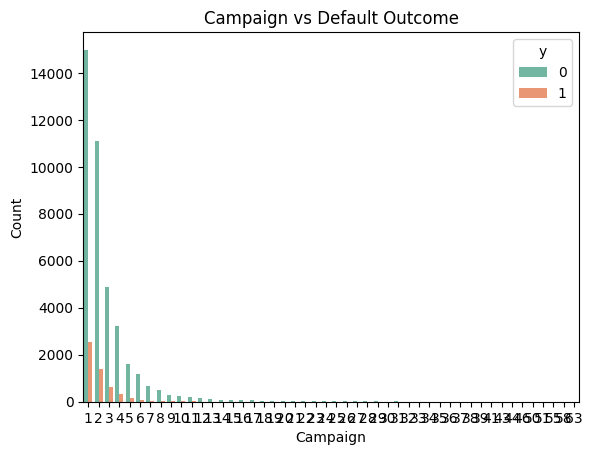

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot for the 'campaign' variable (discrete) and binary target 'y'
sns.countplot(x='campaign', hue='y', data=df, palette='Set2')

plt.title('Campaign vs Default Outcome')
plt.xlabel('Campaign')
plt.ylabel('Count')
plt.show()


In [18]:
import pandas as pd

# Assuming df is your DataFrame with 'campaign' and 'y' columns
campaign_counts = df.groupby('campaign')['y'].value_counts().unstack(fill_value=0)

# Display the result
print(campaign_counts)

y             0     1
campaign             
1         14983  2561
2         11104  1401
3          4903   618
4          3205   317
5          1625   139
6          1199    92
7           688    47
8           508    32
9           306    21
10          252    14
11          185    16
12          151     4
13          127     6
14           89     4
15           80     4
16           77     2
17           63     6
18           51     0
19           44     0
20           42     1
21           34     1
22           23     0
23           22     0
24           19     1
25           22     0
26           13     0
27           10     0
28           16     0
29           15     1
30            8     0
31           12     0
32            8     1
33            6     0
34            5     0
35            4     0
36            4     0
37            2     0
38            3     0
39            1     0
41            2     0
43            3     0
44            1     0
46            1     0
50        

In [19]:
df = df.drop(columns=['day', 'month'])

#### Check for outliers using box plot for numerical  values


<Axes: xlabel='y', ylabel='duration'>

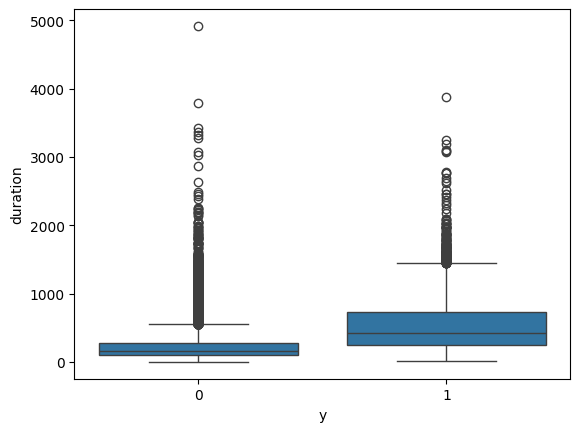

In [20]:
sns.boxplot(x='y', y='duration', data=df)

##### As we can see there's no negative values here. so we can use it as it is.

<Axes: xlabel='y', ylabel='age'>

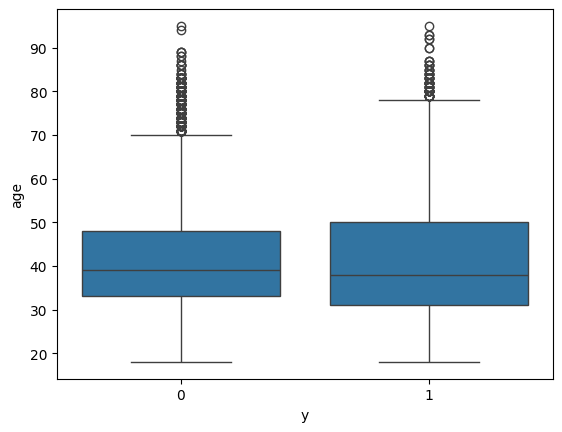

In [21]:
sns.boxplot(x='y', y='age', data=df)

##### There are some extreme values. though those are accpetable. so it can be used directly

<Axes: xlabel='y', ylabel='balance'>

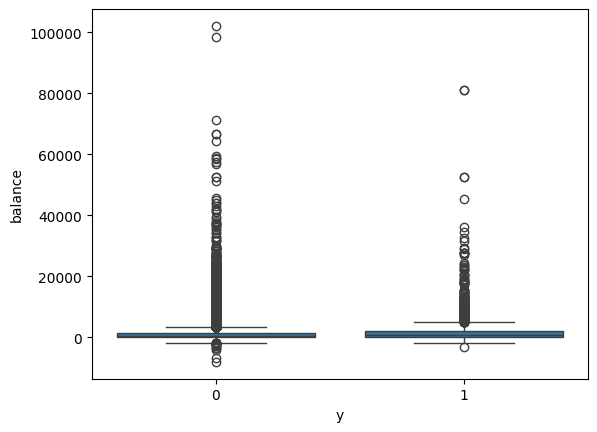

In [22]:
sns.boxplot(x='y', y='balance', data=df)

##### there are negative values as well as extreme values. in this case both can  be accepted. extreme values can be there on some circumstances. for negative values, it can be considered as credits. so can be applied directly

<Axes: xlabel='y', ylabel='previous'>

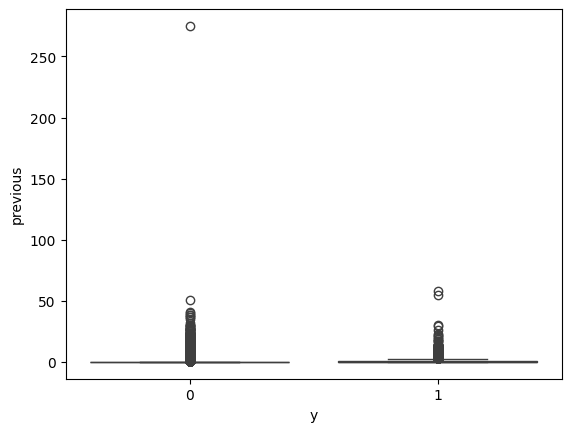

In [23]:
sns.boxplot(x='y', y='previous', data=df)

##### Removing that one outlier

In [24]:
# Identify the record with the extreme value in 'previous'
outlier_row = df[df['previous'] > 250]

# Display the details of the record
print("Outlier row details:")
print(outlier_row)

# Drop the specific row
df = df.drop(outlier_row.index)

# Verify the row is removed
print(f"Updated dataset shape: {df.shape}")

Outlier row details:
       age         job  marital education default  balance housing loan  \
29182   40  management  married  tertiary      no      543     yes   no   

        contact  duration  campaign  pdays  previous poutcome  y  
29182  cellular       349         2    262       275    other  0  
Updated dataset shape: (45210, 15)


In [25]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,198,1,-1,0,unknown,0


##### Label endcoding is used for the categorical features below. these features are important and also it has only two values. to reduce dimension label encoding is used here

#### Analysing pdays

<Axes: xlabel='y', ylabel='pdays'>

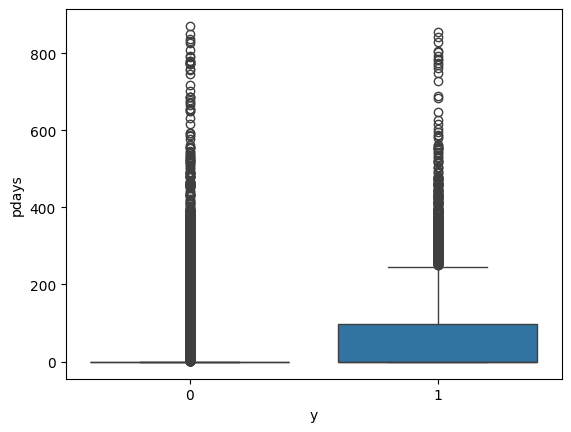

In [26]:
sns.boxplot(x='y', y='pdays', data=df)

In [27]:
from sklearn.preprocessing import StandardScaler

# Step 1: Create a binary feature for whether the client was contacted
df['was_contacted'] = (df['pdays'] != -1).astype(int)  # Boolean to integer

# Step 2: Replace -1 in 'pdays' with 0 for meaningful scaling
df['pdays_cleaned'] = df['pdays'].replace(-1, 0)

# Step 3: Scale the cleaned 'pdays' column
scaler = StandardScaler()
df['pdays_scaled'] = scaler.fit_transform(df[['pdays_cleaned']])

# Step 4: (Optional) Create buckets or categories for 'pdays'
df['pdays_category'] = pd.cut(
    df['pdays'],
    bins=[-2, 0, 100, 300, 900],
    labels=['Not Contacted', 'Recently Contacted', 'Contacted Long Ago', 'Very Long Ago']
)

# Step 5: One-hot encode the categories (optional, if using categorical buckets in the model)
df = pd.get_dummies(df, columns=['pdays_category'], prefix='pdays_cat')

# Ensure all boolean-like columns are integers
df = df.astype({col: 'int' for col in df.select_dtypes(include='bool').columns})

# Display the transformed dataset
print(df)


       age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  duration  ...  previous  poutcome

##### A simple heatmap is plotted to understand the importance of the below housing, loan and default features

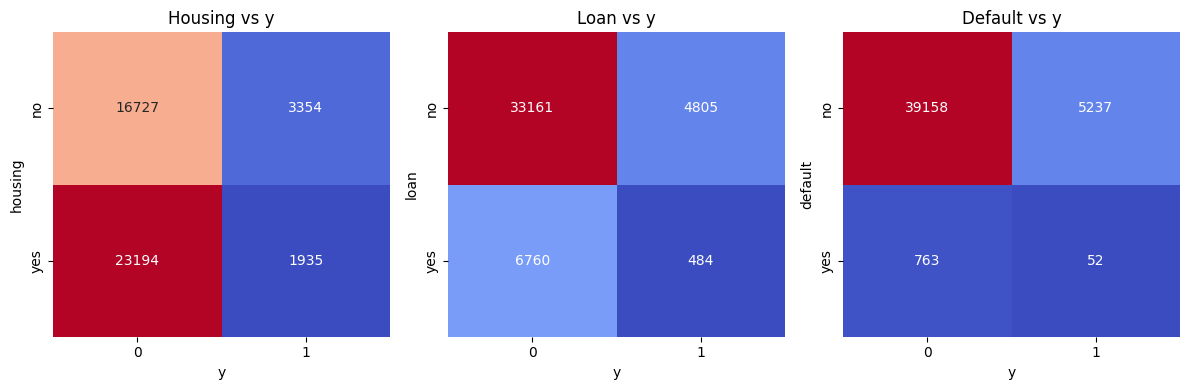

In [28]:
# Create cross-tabulation for each feature with 'y'
cross_tab_housing = pd.crosstab(df['housing'], df['y'])
cross_tab_loan = pd.crosstab(df['loan'], df['y'])
cross_tab_default = pd.crosstab(df['default'], df['y'])

# Plot heatmaps
plt.figure(figsize=(12, 4))

# Heatmap for housing feature
plt.subplot(1, 3, 1)
sns.heatmap(cross_tab_housing, annot=True, fmt='d', cmap='coolwarm', cbar=False)
plt.title('Housing vs y')

# Heatmap for loan feature
plt.subplot(1, 3, 2)
sns.heatmap(cross_tab_loan, annot=True, fmt='d', cmap='coolwarm', cbar=False)
plt.title('Loan vs y')

# Heatmap for default feature
plt.subplot(1, 3, 3)
sns.heatmap(cross_tab_default, annot=True, fmt='d', cmap='coolwarm', cbar=False)
plt.title('Default vs y')

plt.tight_layout()
plt.show()


In [29]:
# List of columns to apply Label Encoding to (yes/no columns)
yes_no_columns = ['default', 'housing', 'loan']

# Apply Label Encoding to each of the columns in the list
df[yes_no_columns] = df[yes_no_columns].replace({'yes': 1, 'no': 0})

df.head()

C:\Users\Thinkpad\AppData\Local\Temp\ipykernel_3732\3595634537.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[yes_no_columns] = df[yes_no_columns].replace({'yes': 1, 'no': 0})


,age,job,marital,education,default,balance,housing,loan,contact,duration,...,previous,poutcome,y,was_contacted,pdays_cleaned,pdays_scaled,pdays_cat_Not Contacted,pdays_cat_Recently Contacted,pdays_cat_Contacted Long Ago,pdays_cat_Very Long Ago
0,58,management,married,tertiary,0,2143,1,0,unknown,261,...,0,unknown,0,0,0,-0.410978,1,0,0,0
1,44,technician,single,secondary,0,29,1,0,unknown,151,...,0,unknown,0,0,0,-0.410978,1,0,0,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,76,...,0,unknown,0,0,0,-0.410978,1,0,0,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,92,...,0,unknown,0,0,0,-0.410978,1,0,0,0
4,33,unknown,single,unknown,0,1,0,0,unknown,198,...,0,unknown,0,0,0,-0.410978,1,0,0,0


##### Doing Label encoding for education. it has a perfect relationship between each unique values. Also it will reduce the dimensionality of the dataset

In [30]:
# Label Encoding
education_mapping = {'primary': 0, 'secondary': 1, 'tertiary': 2, 'unknown': 3}

df['education_encoded'] = df['education'].map(education_mapping)
df = df.drop(columns=['education'])
df.head()

,age,job,marital,default,balance,housing,loan,contact,duration,campaign,...,poutcome,y,was_contacted,pdays_cleaned,pdays_scaled,pdays_cat_Not Contacted,pdays_cat_Recently Contacted,pdays_cat_Contacted Long Ago,pdays_cat_Very Long Ago,education_encoded
0,58,management,married,0,2143,1,0,unknown,261,1,...,unknown,0,0,0,-0.410978,1,0,0,0,2
1,44,technician,single,0,29,1,0,unknown,151,1,...,unknown,0,0,0,-0.410978,1,0,0,0,1
2,33,entrepreneur,married,0,2,1,1,unknown,76,1,...,unknown,0,0,0,-0.410978,1,0,0,0,1
3,47,blue-collar,married,0,1506,1,0,unknown,92,1,...,unknown,0,0,0,-0.410978,1,0,0,0,3
4,33,unknown,single,0,1,0,0,unknown,198,1,...,unknown,0,0,0,-0.410978,1,0,0,0,3


#### Encoding for job feature

In [31]:
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

<Figure size 1000x600 with 0 Axes>

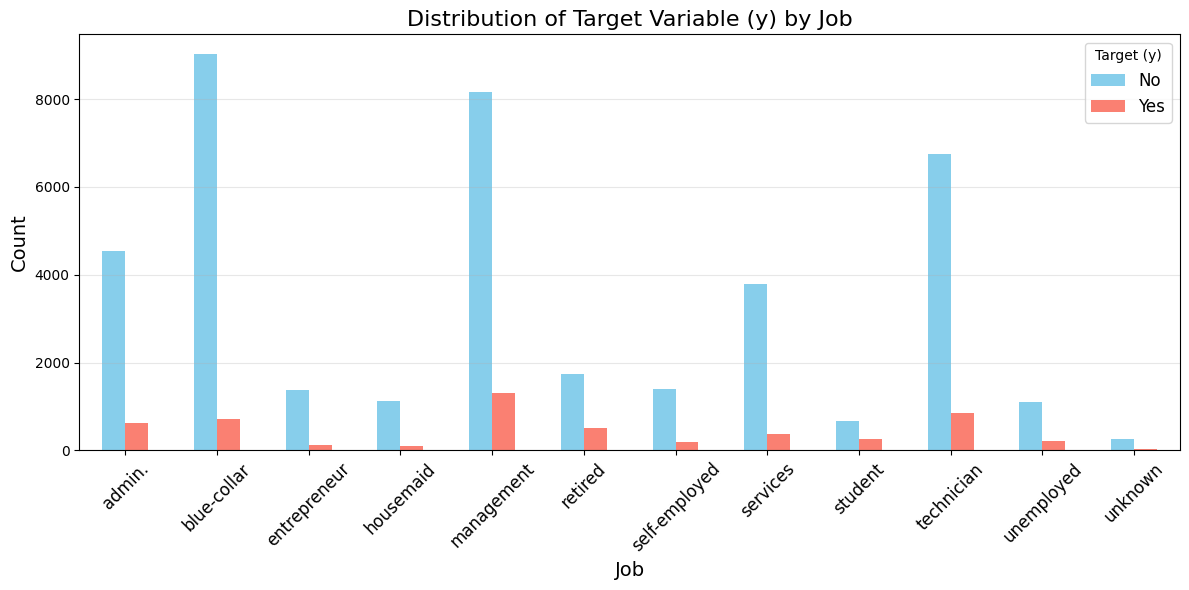

In [32]:
# Grouped bar plot for job and y
plt.figure(figsize=(10, 6))

# Create a crosstab of job vs y
job_y_crosstab = pd.crosstab(df['job'], df['y'])

# Plot the grouped bar chart
job_y_crosstab.plot(kind='bar', figsize=(12, 6), color=['skyblue', 'salmon'])

plt.title("Distribution of Target Variable (y) by Job", fontsize=16)
plt.xlabel("Job", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(["No", "Yes"], title="Target (y)", fontsize=12)
plt.tight_layout()
plt.grid(axis='y', alpha=0.3)
plt.show()


##### This feature plays a crucial role on the trget variable. the perfect approach to this feature is one hot encoding which will treat each category independently

In [33]:
# Apply One-Hot Encoding to the 'job' column
df_encoded = pd.get_dummies(df['job'], prefix='job')

# Convert True/False to 1/0
df_encoded = df_encoded.astype(int)

# Optionally, concatenate the encoded columns with the original dataframe
df = pd.concat([df, df_encoded], axis=1)

# Drop the original 'job' column
df.drop('job', axis=1, inplace=True)

df.head()

,age,marital,default,balance,housing,loan,contact,duration,campaign,pdays,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,58,married,0,2143,1,0,unknown,261,1,-1,...,0,0,1,0,0,0,0,0,0,0
1,44,single,0,29,1,0,unknown,151,1,-1,...,0,0,0,0,0,0,0,1,0,0
2,33,married,0,2,1,1,unknown,76,1,-1,...,1,0,0,0,0,0,0,0,0,0
3,47,married,0,1506,1,0,unknown,92,1,-1,...,0,0,0,0,0,0,0,0,0,0
4,33,single,0,1,0,0,unknown,198,1,-1,...,0,0,0,0,0,0,0,0,0,1


#### One hot encoding the contact column

In [34]:
# Apply One-Hot Encoding to the 'contact' column
df_encoded = pd.get_dummies(df['contact'], prefix='contact')

# Convert True/False to 1/0
df_encoded = df_encoded.astype(int)

# concatenate the encoded columns with the original dataframe
df = pd.concat([df, df_encoded], axis=1)

# Drop the original 'contact' column
df.drop('contact', axis=1, inplace=True)

df.head()

,age,marital,default,balance,housing,loan,duration,campaign,pdays,previous,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,contact_cellular,contact_telephone,contact_unknown
0,58,married,0,2143,1,0,261,1,-1,0,...,0,0,0,0,0,0,0,0,0,1
1,44,single,0,29,1,0,151,1,-1,0,...,0,0,0,0,1,0,0,0,0,1
2,33,married,0,2,1,1,76,1,-1,0,...,0,0,0,0,0,0,0,0,0,1
3,47,married,0,1506,1,0,92,1,-1,0,...,0,0,0,0,0,0,0,0,0,1
4,33,single,0,1,0,0,198,1,-1,0,...,0,0,0,0,0,0,1,0,0,1


In [35]:
from scipy.stats import chi2_contingency

# If p value is < 0.05, the feature is influencing the targeted variable

crosstab = pd.crosstab(df['poutcome'], df['y'])
chi2, p, dof, expected = chi2_contingency(crosstab)
print("Chi-square statistic:", chi2)
print("p-value:", p)


Chi-square statistic: 4391.55947194763
p-value: 0.0


In [36]:
from sklearn.preprocessing import LabelEncoder
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to the 'poutcome' column
df['poutcome_encoded'] = label_encoder.fit_transform(df['poutcome'])

df.drop('poutcome', axis=1, inplace=True)

# Display the resulting DataFrame
print(df)

       age   marital  default  balance  housing  loan  duration  campaign  \
0       58   married        0     2143        1     0       261         1   
1       44    single        0       29        1     0       151         1   
2       33   married        0        2        1     1        76         1   
3       47   married        0     1506        1     0        92         1   
4       33    single        0        1        0     0       198         1   
...    ...       ...      ...      ...      ...   ...       ...       ...   
45206   51   married        0      825        0     0       977         3   
45207   71  divorced        0     1729        0     0       456         2   
45208   72   married        0     5715        0     0      1127         5   
45209   57   married        0      668        0     0       508         4   
45210   37   married        0     2971        0     0       361         2   

       pdays  previous  ...  job_self-employed  job_services  job_student  

#### marital will also play a huge role on prediction. so treating them indpendently will be a boost in the model. so one hot encoding is more suitable here

In [37]:
from scipy.stats import chi2_contingency

# If p value is < 0.05, the feature is influencing the targeted variable

crosstab = pd.crosstab(df['marital'], df['y'])
chi2, p, dof, expected = chi2_contingency(crosstab)
print("Chi-square statistic:", chi2)
print("p-value:", p)


Chi-square statistic: 196.45890449554065
p-value: 2.185198674532852e-43


In [38]:
# Apply One-Hot Encoding to the 'marital' column
df_encoded = pd.get_dummies(df['marital'], prefix='marital')

# Convert boolean columns to integers (1 for True, 0 for False)
df_encoded = df_encoded.astype(int)

# Concatenate the encoded columns with the original dataframe
df = pd.concat([df, df_encoded], axis=1)

# Drop the original 'marital' column
df.drop('marital', axis=1, inplace=True)

# Display the resulting DataFrame
print(df)

       age  default  balance  housing  loan  duration  campaign  pdays  \
0       58        0     2143        1     0       261         1     -1   
1       44        0       29        1     0       151         1     -1   
2       33        0        2        1     1        76         1     -1   
3       47        0     1506        1     0        92         1     -1   
4       33        0        1        0     0       198         1     -1   
...    ...      ...      ...      ...   ...       ...       ...    ...   
45206   51        0      825        0     0       977         3     -1   
45207   71        0     1729        0     0       456         2     -1   
45208   72        0     5715        0     0      1127         5    184   
45209   57        0      668        0     0       508         4     -1   
45210   37        0     2971        0     0       361         2    188   

       previous  y  ...  job_technician  job_unemployed  job_unknown  \
0             0  0  ...               0

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45210 entries, 0 to 45210
Data columns (total 36 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           45210 non-null  int64  
 1   default                       45210 non-null  int64  
 2   balance                       45210 non-null  int64  
 3   housing                       45210 non-null  int64  
 4   loan                          45210 non-null  int64  
 5   duration                      45210 non-null  int64  
 6   campaign                      45210 non-null  int64  
 7   pdays                         45210 non-null  int64  
 8   y                             45210 non-null  int64  
 9   was_contacted                 45210 non-null  int32  
 10  pdays_cleaned                 45210 non-null  int64  
 11  pdays_scaled                  45210 non-null  float64
 12  pdays_cat_Not Contacted       45210 non-null  int32  
 13  pdays_

#### Finally all the Transformation, datahandling, feature selections are done. Now a Neural netowrk model is built using tensorflow library. then datas were split and trained.

Epoch 1/70


c:\Users\Thinkpad\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


905/905 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7855 - loss: 5.9154 - val_accuracy: 0.8811 - val_loss: 0.4259
Epoch 2/70
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8762 - loss: 0.4477 - val_accuracy: 0.8897 - val_loss: 0.4975
Epoch 3/70
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8813 - loss: 0.4000 - val_accuracy: 0.8853 - val_loss: 0.2951
Epoch 4/70
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8836 - loss: 0.3396 - val_accuracy: 0.8847 - val_loss: 0.4897
Epoch 5/70
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8847 - loss: 0.3580 - val_accuracy: 0.8844 - val_loss: 0.2900
Epoch 6/70
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8821 - loss: 0.3355 - val_accuracy: 0.8901 - val_loss: 0.2800
Epoch 7/70
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8808 - loss: 0.3790 - val_accuracy: 0.8951 - val_loss: 0.2676
Epoch 8/70
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8857 - loss: 0.3537 - val_accuracy: 0.8954 - val_

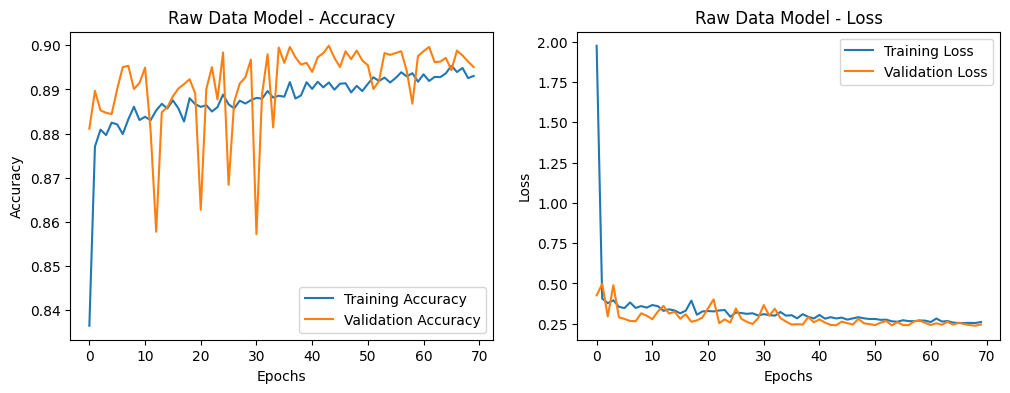

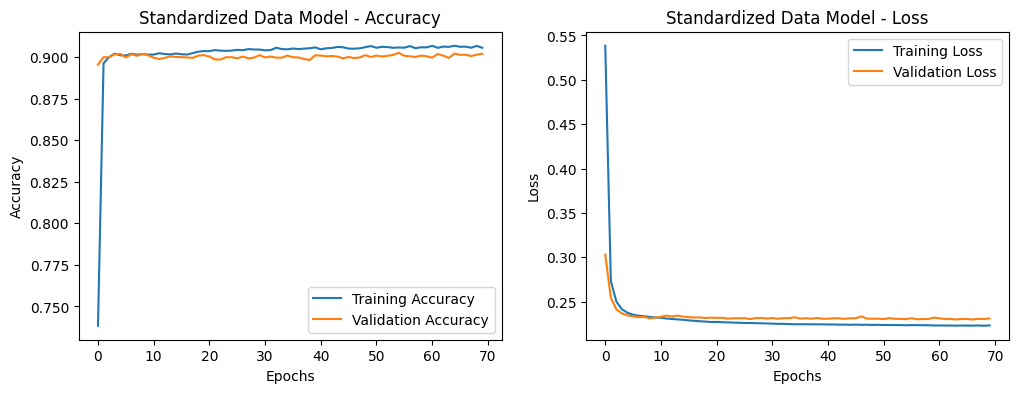

In [53]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Features (all columns except 'y')
X = df.drop('y', axis=1).values  
y = df['y'].values

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model architecture (both models will be the same)
def build_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(10, activation='relu', input_shape=(X_train.shape[1],)),  # Hidden layer with 10 neurons
        tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Train the model on raw data (without standardization)
model_raw = build_model()
history_raw = model_raw.fit(X_train, y_train, epochs=70, batch_size=32, validation_split=0.2, verbose=1)

# Train the model on standardized data (with standardization)
model_scaled = build_model()
history_scaled = model_scaled.fit(X_train_scaled, y_train, epochs=70, batch_size=32, validation_split=0.2, verbose=1)

# Plotting the graphs
def plot_history(history, title):
    # Plot Accuracy
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Plot for the raw data model
plot_history(history_raw, 'Raw Data Model')

# Plot for the standardized data model
plot_history(history_scaled, 'Standardized Data Model')


#### Evaluating the model

In [54]:
from sklearn.metrics import classification_report, confusion_matrix

# Evaluate the model on raw data
test_loss_raw, test_accuracy_raw = model_raw.evaluate(X_test, y_test)
print(f"Test Accuracy (Raw Data): {test_accuracy_raw * 100:.2f}%")

# Evaluate the model on standardized data
test_loss_scaled, test_accuracy_scaled = model_scaled.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy (Standardized Data): {test_accuracy_scaled * 100:.2f}%")

# Make predictions and evaluate using sklearn (both raw and standardized data)
y_pred_raw = (model_raw.predict(X_test) > 0.5).astype("int32")
y_pred_scaled = (model_scaled.predict(X_test_scaled) > 0.5).astype("int32")

# Evaluation metrics for raw data
print("\nClassification Report (Raw Data):")
print(classification_report(y_test, y_pred_raw))
print("\nConfusion Matrix (Raw Data):")
print(confusion_matrix(y_test, y_pred_raw))

# Evaluation metrics for standardized data
print("\nClassification Report (Standardized Data):")
print(classification_report(y_test, y_pred_scaled))
print("\nConfusion Matrix (Standardized Data):")
print(confusion_matrix(y_test, y_pred_scaled))


283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8885 - loss: 0.2627
Test Accuracy (Raw Data): 89.15%
283/283 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8940 - loss: 0.2427
Test Accuracy (Standardized Data): 89.69%
283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Classification Report (Raw Data):
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7949
           1       0.62      0.26      0.37      1093

    accuracy                           0.89      9042
   macro avg       0.76      0.62      0.66      9042
weighted avg       0.87      0.89      0.87      9042


Confusion Matrix (Raw Data):
[[7772  177]
 [ 804  289]]

Classification Report (Standardized Data):
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7949
           1       0.64      0.33      0.44      1093

    accuracy                           0.90      9042
   macro avg

Class Weights: {0: 0.5656199174277493, 1: 4.309818875119161}
Epoch 1/70


c:\Users\Thinkpad\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


905/905 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6809 - loss: 0.5539 - val_accuracy: 0.8143 - val_loss: 0.4411
Epoch 2/70
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8050 - loss: 0.4319 - val_accuracy: 0.8063 - val_loss: 0.4438
Epoch 3/70
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8061 - loss: 0.4212 - val_accuracy: 0.8066 - val_loss: 0.4267
Epoch 4/70
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8063 - loss: 0.4036 - val_accuracy: 0.8027 - val_loss: 0.4140
Epoch 5/70
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7982 - loss: 0.4087 - val_accuracy: 0.8083 - val_loss: 0.3958
Epoch 6/70
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7996 - loss: 0.4022 - val_accuracy: 0.8018 - val_loss: 0.4118
Epoch 7/70
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7967 - loss: 0.4035 - val_accuracy: 0.7978 - val_loss: 0.4229
Epoch 8/70
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8007 - loss: 0.4021 - val_accuracy: 0.7960 - val_

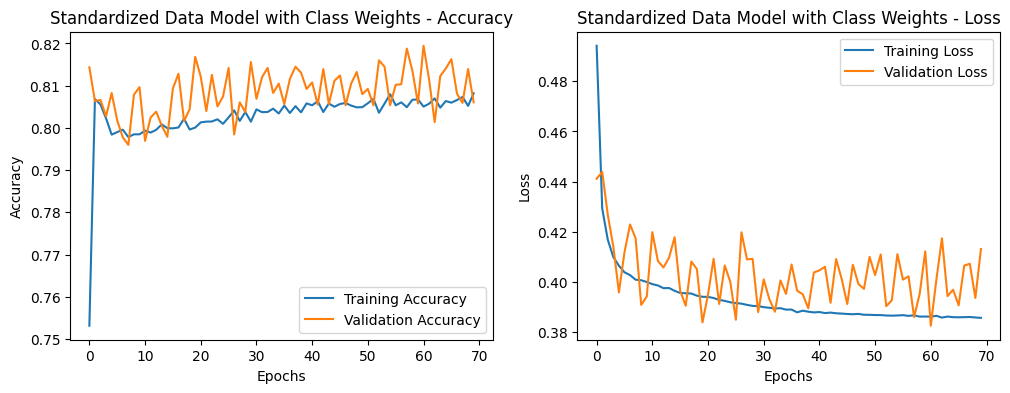

In [55]:
# Compute class weights
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_weights = compute_class_weight(
    class_weight="balanced",
    classes=np.unique(y_train),
    y=y_train
)
class_weights = dict(enumerate(class_weights))

print("Class Weights:", class_weights)

# Train the model with class weights
model_scaled_class_weights = build_model()
history_class_weights = model_scaled_class_weights.fit(
    X_train_scaled, y_train,
    epochs=70,
    batch_size=32,
    validation_split=0.2,
    class_weight=class_weights,  # Add class weights here
    verbose=1
)

# Plot for the model trained with class weights
plot_history(history_class_weights, 'Standardized Data Model with Class Weights')


#### HyperParameter tuning by increasing hidden layers and decreasing epoch

Reloading Tuner from tuner_results\hyperparameter_tuning\tuner0.json
Best hyperparameters:  {'units1': 8, 'num_layers': 1, 'units_2': 24, 'learning_rate': 0.008583846101691946, 'units_3': 48, 'units_4': 40, 'tuner/epochs': 60, 'tuner/initial_epoch': 0, 'tuner/bracket': 0, 'tuner/round': 0}
Class Weights: {0: 0.5656199174277493, 1: 4.309818875119161}
Epoch 1/60


c:\Users\Thinkpad\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


905/905 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7418 - loss: 0.4951 - val_accuracy: 0.8062 - val_loss: 0.4064
Epoch 2/60
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7905 - loss: 0.4303 - val_accuracy: 0.7949 - val_loss: 0.4649
Epoch 3/60
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7908 - loss: 0.4254 - val_accuracy: 0.7965 - val_loss: 0.4258
Epoch 4/60
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8022 - loss: 0.4058 - val_accuracy: 0.8206 - val_loss: 0.3686
Epoch 5/60
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7981 - loss: 0.4129 - val_accuracy: 0.8271 - val_loss: 0.3559
Epoch 6/60
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7994 - loss: 0.3975 - val_accuracy: 0.7969 - val_loss: 0.4426
Epoch 7/60
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8005 - loss: 0.4068 - val_accuracy: 0.7885 - val_loss: 0.4211
Epoch 8/60
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7972 - loss: 0.4022 - val_accuracy: 0.8269 - val_

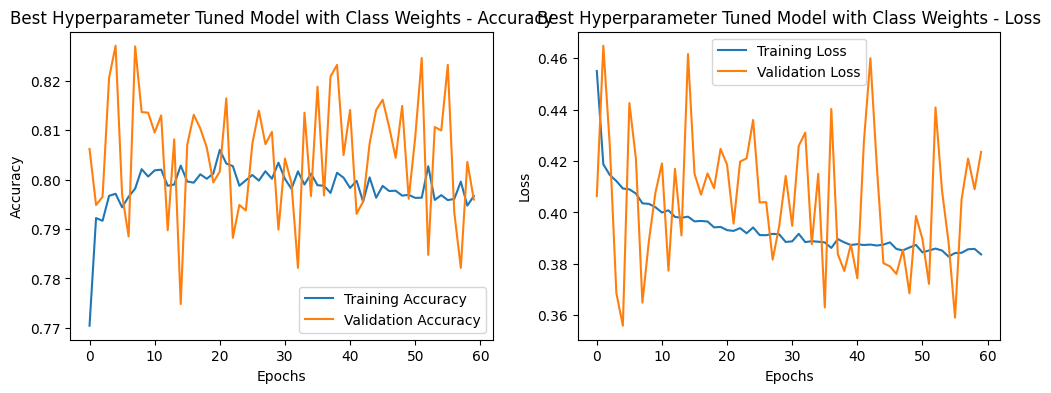

In [56]:
import tensorflow as tf
import keras_tuner as kt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight


# Features (all columns except 'y')
X = df.drop('y', axis=1).values  
y = df['y'].values

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the model-building function for the tuner
def build_model(hp):
    model = tf.keras.Sequential()

    # Tuning the number of layers and neurons
    model.add(tf.keras.layers.Dense(
        hp.Int('units1', min_value=8, max_value=64, step=8), 
        activation='relu', 
        input_shape=(X_train.shape[1],)
    ))
    
    # Optionally add more layers
    for i in range(hp.Int('num_layers', 1, 3)):  # 1 to 3 hidden layers
        model.add(tf.keras.layers.Dense(
            hp.Int(f'units_{i+2}', min_value=8, max_value=64, step=8),
            activation='relu'
        ))
    
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    
    # Compile the model with a tunable learning rate
    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            learning_rate=hp.Float('learning_rate', min_value=1e-5, max_value=1e-2, sampling='LOG')
        ),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    return model

# Define the tuner
tuner = kt.Hyperband(
    build_model,  # The model-building function
    objective='val_accuracy',  # The metric to optimize
    max_epochs=60,  # Max epochs to train each model
    factor=3,  # Factor by which the number of trials is reduced
    directory='tuner_results',  # Directory to save results
    project_name='hyperparameter_tuning',  # Name for the project
)

# Run the tuner
tuner.search(X_train_scaled, y_train, epochs=60, validation_split=0.2, verbose=1)

# Get the best hyperparameters
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best hyperparameters: ", best_hyperparameters.values)

# Build the best model with the best hyperparameters
best_model = tuner.hypermodel.build(best_hyperparameters)

# Compute class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = dict(enumerate(class_weights))
print("Class Weights:", class_weights)

# Modify the training step to use class weights
history = best_model.fit(
    X_train_scaled, y_train,
    epochs=60,
    validation_split=0.2,
    batch_size=32,
    verbose=1,
    class_weight=class_weights  # Pass class weights here
)

# Evaluate on the test set
test_loss, test_accuracy = best_model.evaluate(X_test_scaled, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Plot the history of the best model
plot_history(history, 'Best Hyperparameter Tuned Model with Class Weights')

# Plotting the training and validation metrics
def plot_history(history, title):
    # Plot Accuracy
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()



In [45]:
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best hyperparameters: ", best_hyperparameters.values)

Best hyperparameters:  {'units1': 8, 'num_layers': 1, 'units_2': 24, 'learning_rate': 0.008583846101691946, 'units_3': 48, 'units_4': 40, 'tuner/epochs': 60, 'tuner/initial_epoch': 0, 'tuner/bracket': 0, 'tuner/round': 0}


283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.79      0.87      7949
           1       0.36      0.86      0.50      1093

    accuracy                           0.80      9042
   macro avg       0.67      0.82      0.69      9042
weighted avg       0.90      0.80      0.83      9042



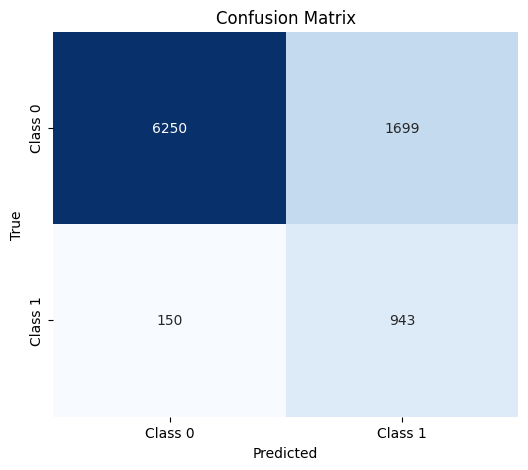

In [58]:
# Make predictions on the test set
y_pred = best_model.predict(X_test_scaled)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary (0 or 1)

# Print the classification report
from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [50]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the classes in the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Train the model again using the balanced data
history = best_model.fit(
    X_train_smote, y_train_smote,
    epochs=60,
    validation_split=0.2,
    batch_size=32,
    verbose=1,
    class_weight=class_weights  # You can still use class weights if needed
)

Epoch 1/60
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7739 - loss: 0.4958 - val_accuracy: 0.9744 - val_loss: 0.0918
Epoch 2/60
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7674 - loss: 0.4652 - val_accuracy: 0.9760 - val_loss: 0.0984
Epoch 3/60
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7682 - loss: 0.4719 - val_accuracy: 0.9751 - val_loss: 0.1182
Epoch 4/60
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7647 - loss: 0.4757 - val_accuracy: 0.9769 - val_loss: 0.0952
Epoch 5/60
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7683 - loss: 0.4698 - val_accuracy: 0.9745 - val_loss: 0.0975
Epoch 6/60
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7667 - loss: 0.4734 - val_accuracy: 0.9800 - val_loss: 0.0971
Epoch 7/60
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7668 - loss: 0.4689 - val_accuracy: 0.9784 - val_loss: 0.0965
Epoch 8/60
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7724 - loss: 0.4608 - 

#### Then evaluate the model

In [46]:
from sklearn.metrics import  classification_report, confusion_matrix

# Evaluate the model on raw data
test_loss_raw, test_accuracy_raw = model_raw.evaluate(X_test, y_test)
print(f"Test Accuracy (Raw Data): {test_accuracy_raw * 100:.2f}%")

# Evaluate the model on standardized data
test_loss_scaled, test_accuracy_scaled = model_scaled.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy (Standardized Data): {test_accuracy_scaled * 100:.2f}%")

# Make predictions and evaluate using sklearn (both raw and standardized data)
y_pred_raw = (model_raw.predict(X_test) > 0.5).astype("int32")
y_pred_scaled = (model_scaled.predict(X_test_scaled) > 0.5).astype("int32")

# Evaluation metrics for raw data
print("\nClassification Report (Raw Data):")
print(classification_report(y_test, y_pred_raw))
print("\nConfusion Matrix (Raw Data):")
print(confusion_matrix(y_test, y_pred_raw))

# Evaluation metrics for standardized data
print("\nClassification Report (Standardized Data):")
print(classification_report(y_test, y_pred_scaled))
print("\nConfusion Matrix (Standardized Data):")
print(confusion_matrix(y_test, y_pred_scaled))


283/283 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8865 - loss: 0.2999
Test Accuracy (Raw Data): 88.93%
283/283 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8929 - loss: 0.2430
Test Accuracy (Standardized Data): 89.59%
283/283 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
283/283 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step

Classification Report (Raw Data):
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7949
           1       0.58      0.31      0.40      1093

    accuracy                           0.89      9042
   macro avg       0.74      0.64      0.67      9042
weighted avg       0.87      0.89      0.87      9042


Confusion Matrix (Raw Data):
[[7705  244]
 [ 757  336]]

Classification Report (Standardized Data):
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7949
           1       0.61      0.38      0.47      1093

    accuracy                           0.90      9042
   macro avg

In [ ]:
from sklearn.metrics import  classification_report, confusion_matrix


# Evaluate the model on standardized data
test_loss_scaled, test_accuracy_scaled = model_scaled.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy (Standardized Data): {test_accuracy_scaled * 100:.2f}%")

# Make predictions and evaluate using sklearn (both raw and standardized data)
y_pred_raw = (model_raw.predict(X_test) > 0.5).astype("int32")
y_pred_scaled = (model_scaled.predict(X_test_scaled) > 0.5).astype("int32")


# Evaluation metrics for standardized data
print("\nClassification Report (Standardized Data):")
print(classification_report(y_test, y_pred_scaled))
print("\nConfusion Matrix (Standardized Data):")
print(confusion_matrix(y_test, y_pred_scaled))


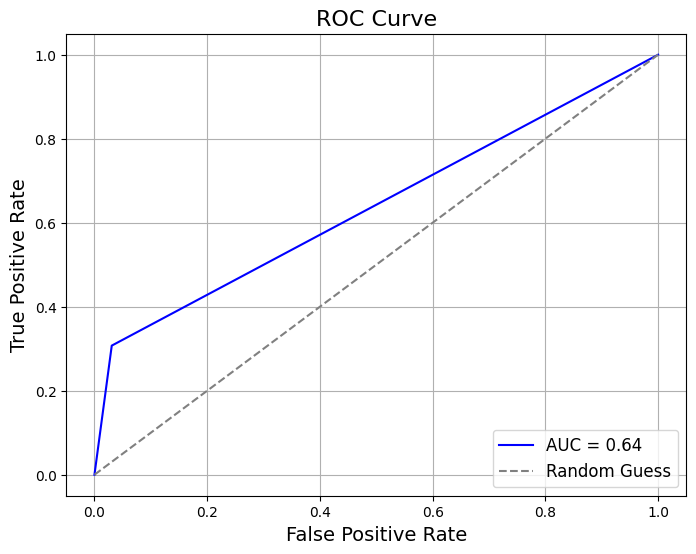

In [47]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assume y_test is the true labels and y_prob contains predicted probabilities
fpr, tpr, thresholds = roc_curve(y_test, y_pred_raw)
auc = roc_auc_score(y_test, y_pred_raw)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.title('ROC Curve', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.grid(True)
plt.show()


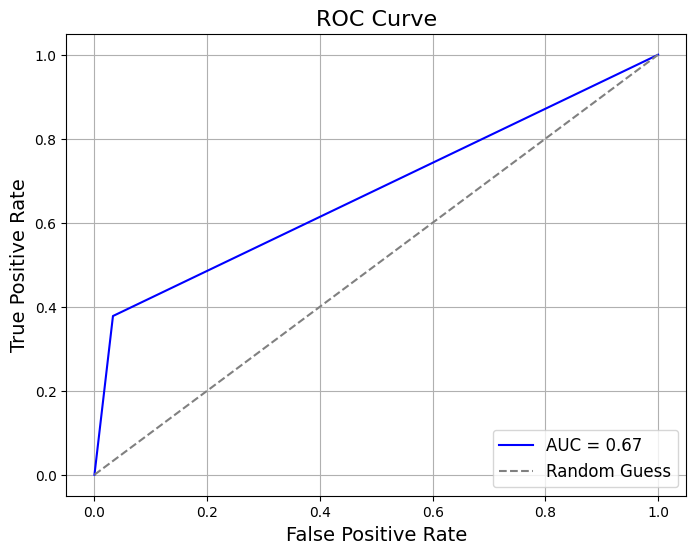

In [48]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assume y_test is the true labels and y_prob contains predicted probabilities
fpr, tpr, thresholds = roc_curve(y_test, y_pred_scaled)
auc = roc_auc_score(y_test, y_pred_scaled)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.title('ROC Curve', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.grid(True)
plt.show()
